In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [4]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '1 The Last Wish.txt'>, <DirEntry 'test_cryptojacking.txt'>]

In [6]:
book = all_books[0]
# book = cryptojacking
book_text = open(book).read()
print(book_text)

'Does she always devour her victims?' 

Velerad spat vehemently on the straw. 

'Come on, Geralt, it'll be supper soon. Pish! Devours, takes a bite, leaves aside, it varies - 
according to her mood, no doubt. She only bit the head from one, gutted a couple, and a few 
more she picked clean to the bone, sucked them dry, you could say. Damned mother's-!' 

'Careful, Velerad,' snarled Ostrit. 'Say what you want about the striga but do not insult Adda 
in front of me, as you would not dare in the king's presence!' 

'Has anyone she's attacked survived?' The witcher asked, apparently paying no special 
attention to the magnate's outburst. 

Segelin and Ostrit looked at each other. 

'Yes,' said the bearded man. 'At the very beginning, seven years ago, she threw herself at two 
soldiers standing guard over the crypt. One escaped-' 

And then,' interrupted Velerad, 'there was another, the miller she attacked near the town. You 
remember . . . ?' 

 

IV 

 

The following day, late in the eve

In [7]:
book_doc = NER(book_text)


In [8]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Load character names

In [9]:
# Read characters
character_df = pd.read_csv("characters.csv")
print(character_df.head(10))

                                  book      character
0  Category:Baptism of Fire characters         Adalia
1  Category:Baptism of Fire characters          Adela
2  Category:Baptism of Fire characters  Aen Saevherne
3  Category:Baptism of Fire characters       Aevenien
4  Category:Baptism of Fire characters         Aglaïs
5  Category:Baptism of Fire characters        Albrich
6  Category:Baptism of Fire characters         Amavet
7  Category:Baptism of Fire characters  Angus Bri Cri
8  Category:Baptism of Fire characters    Anna Kameny
9  Category:Baptism of Fire characters   Anzelm Aubry


In [10]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [11]:
pd.set_option('display.max_rows', None)
character_df

book  \
0                   Category:Baptism of Fire characters   
1                   Category:Baptism of Fire characters   
2                   Category:Baptism of Fire characters   
3                   Category:Baptism of Fire characters   
4                   Category:Baptism of Fire characters   
5                   Category:Baptism of Fire characters   
6                   Category:Baptism of Fire characters   
7                   Category:Baptism of Fire characters   
8                   Category:Baptism of Fire characters   
9                   Category:Baptism of Fire characters   
10                  Category:Baptism of Fire characters   
11                  Category:Baptism of Fire characters   
12                  Category:Baptism of Fire characters   
13                  Category:Baptism of Fire characters   
14                  Category:Baptism of Fire characters   
15                  Category:Baptism of Fire characters   
16                  Category:Baptism of Fire characters   
17                  Category:Baptism of Fire characters   
18                  Category:Baptism of Fire characters   
19                  Category:Baptism of Fire characters   
20                  Category:Baptism of Fire characters   
21                  Category:Baptism of Fire characters   
22                  Category:Baptism of Fire characters   
23                  Category:Baptism of Fire characters   
24                  Category:Baptism of Fire characters   
25                  Category:Baptism of Fire characters   
26                  Category:Baptism of Fire characters   
27                  Category:Baptism of Fire characters   
28                  Category:Baptism of Fire characters   
29                  Category:Baptism of Fire characters   
30                  Category:Baptism of Fire characters   
31                  Category:Baptism of Fire characters   
32                  Category:Baptism of Fire characters   
33                  Category:Baptism of Fire characters   
34                  Category:Baptism of Fire characters   
35                  Category:Baptism of Fire characters   
36                  Category:Baptism of Fire characters   
37                  Category:Baptism of Fire characters   
38                  Category:Baptism of Fire characters   
39                  Category:Baptism of Fire characters   
40                  Category:Baptism of Fire characters   
41                  Category:Baptism of Fire characters   
42                  Category:Baptism of Fire characters   
43                  Category:Baptism of Fire characters   
44                  Category:Baptism of Fire characters   
45                  Category:Baptism of Fire characters   
46                  Category:Baptism of Fire characters   
47                  Category:Baptism of Fire characters   
48                  Category:Baptism of Fire characters   
49                  Category:Baptism of Fire characters   
50                  Category:Baptism of Fire characters   
51                  Category:Baptism of Fire characters   
52                  Category:Baptism of Fire characters   
53                  Category:Baptism of Fire characters   
54                  Category:Baptism of Fire characters   
55                  Category:Baptism of Fire characters   
56                  Category:Baptism of Fire characters   
57                  Category:Baptism of Fire characters   
58                  Category:Baptism of Fire characters   
59                  Category:Baptism of Fire characters   
60                  Category:Baptism of Fire characters   
61                  Category:Baptism of Fire characters   
62                  Category:Baptism of Fire characters   
63                  Category:Baptism of Fire characters   
64                  Category:Baptism of Fire characters   
65                  Category:Baptism of Fire characters   
66                  Category:Baptism of Fire characters   
67                  Category:Baptism of

## Get named entity list per sentence

In [12]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [13]:
sent_entity_df

sentence  \
0     (﻿'Does, she, always, devour, her, victims, ?,...   
1     (Velerad, spat, vehemently, on, the, straw, .,...   
2     (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
3                                             (Pish, !)   
4     (Devours, ,, takes, a, bite, ,, leaves, aside,...   
5     (She, only, bit, the, head, from, one, ,, gutt...   
6     (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7     (', Say, what, you, want, about, the, striga, ...   
8     (', Has, anyone, she, 's, attacked, survived, ...   
9     (The, witcher, asked, ,, apparently, paying, n...   
10    (Segelin, and, Ostrit, looked, at, each, other...   
11           (', Yes, ,, ', said, the, bearded, man, .)   
12    (', At, the, very, beginning, ,, seven, years,...   
13                             (One, escaped-, ', \n\n)   
14    (And, then, ,, ', interrupted, Velerad, ,, ', ...   
15        (You, \n, remember, ., ., ., ?, ', \n\n \n\n)   
16    (IV, \n\n \n\n, The, following, day, ,, late, ...   
17    (He, was, led, in, by, a, soldier, in, a, hood...   
18    (The, conversation, did, not, yield, any, sign...   
19    (The, miller, was, terrified, ;, he, mumbled, ...   
20    (The, striga, could, open, her, \n, jaws, impr...   
21    (Her, claws, were, sharper, than, a, wildcat, ...   
22    (And, \n, it, was, only, because, of, that, th...   
23    (Having, finished, his, examination, Geralt, n...   
24    (The, soldier, pushed, the, peasant, through, ...   
25                 (It, was, Foltest, himself, ., \n\n)   
26    (', Sit, ,, do, not, get, up, ,, ', said, the,...   
27                  (', This, visit, is, unofficial, .)   
28           (Are, you, happy, with, the, interview, ?)   
29    (I, \n, heard, you, were, at, the, palace, thi...   
30               (', Yes, ,, your, Majesty, ., ', \n\n)   
31    (', When, will, you, set, about, your, task, ?...   
32    (', It, is, four, days, until, the, full, moon...   
33                            (After, that, ., ', \n\n)   
34    (', You, prefer, to, have, a, look, at, her, y...   
35                          (', There, is, no, need, .)   
36    (But, having, had, her, fill, the-, the, princ...   
37        (', Striga, ,, master, witcher, ,, striga, .)   
38               (Let, us, not, play, at, diplomacy, .)   
39      (She, will, be, a, princess, afterwards, ., \n)   
40    (And, that, is, what, I, have, come, to, talk,...   
41    (Answer, me, unofficially, ,, briefly, and, cl...   
42      (Do, n't, hide, behind, your, code, ., ', \n\n)   
43                 (Geralt, rubbed, his, brow, ., \n\n)   
44    (', I, confirm, ,, your, Majesty, ,, that, the...   
45    (And, ,, unless, I, am, mistaken, ,, it, can, ...   
46    (The, third, crowing, of, the, cock, ,, as, lo...   
47    (That, is, what, is, usually, done, with, \n, ...   
48                          (', So, simple, ?, ', \n\n)   
49                          (', It, is, not, simple, .)   
50       (First, you, have, to, survive, the, night, .)   
51    (Then, there, are, exceptions, to, the, rule, ...   
52                                   (Consecutively, .)   
53       (There, are, also, cases, which, are, ., ., .)   
54                                  (well, ., ., ., \n)   
55                               (hopeless, ., ', \n\n)   
56                    (Yes, ,, ', Foltest, bristled, .)   
57    (', I, keep, hearing, that, from, some, people...   
58    (Kill, the, monster, because, it, 's, an, \n, ...   
59    (Master, witcher, ,, I, \n\n, am, sure, they, ...   
60                                    (Am, I, right, ?)   
61    (Hack, the, man, -, eater, to, death, without,...   
62     (I, wo, n't, pay, ,, but, \n\n\n, they, will, .)   
63                                (Very, convenient, .)   
64                                      (And, cheap, .)   
65    (Because, the, king, will, order, the, witcher...   
66    (', The, king, unconditionally, orders, the, w...   
67                          (Geralt

In [14]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [15]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [16]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
1   (Velerad, spat, vehemently, on, the, straw, .,...   
2   (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
6   (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7   (', Say, what, you, want, about, the, striga, ...   
10  (Segelin, and, Ostrit, looked, at, each, other...   
14  (And, then, ,, ', interrupted, Velerad, ,, ', ...   
23  (Having, finished, his, examination, Geralt, n...   
25               (It, was, Foltest, himself, ., \n\n)   
43               (Geralt, rubbed, his, brow, ., \n\n)   
67                        (Geralt, grimaced, ., \n\n)   

                      entities character_entities  
1                    [Velerad]          [Velerad]  
2                     [Geralt]           [Geralt]  
6   [Careful, Velerad, Ostrit]  [Velerad, Ostrit]  
7                       [Adda]             [Adda]  
10           [Segelin, Ostrit]  [Segelin, Ostrit]  
14                   [Velerad]          [Velerad]  
23            [Geralt, miller]           [Geralt]  
25                   [Foltest]          [Foltest]  
43                    [Geralt]           [Geralt]  
67                    [Geralt]           [Geralt]

In [17]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

/var/folders/66/b163n8hx53jd1cp1mmmrdylc0000gn/T/ipykernel_58538/364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [18]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
1     (Velerad, spat, vehemently, on, the, straw, .,...   
2     (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
6     (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7     (', Say, what, you, want, about, the, striga, ...   
10    (Segelin, and, Ostrit, looked, at, each, other...   
...                                                 ...   
8884                       (She, turned, to, Geralt, .)   
8886                               (', Geralt, ., ., .)   
8887  (Iola-, ', \n\n, ', Do, n't, say, anything, ,,...   
8889               (Geralt, ,, do, n't, go, ., ', \n\n)   
8899                       (So, long, ,, Nenneke, ., ')   

                        entities character_entities  
1                      [Velerad]          [Velerad]  
2                       [Geralt]           [Geralt]  
6     [Careful, Velerad, Ostrit]  [Velerad, Ostrit]  
7                         [Adda]             [Adda]  
10             [Segelin, Ostrit]  [Segelin, Ostrit]  
...                          ...                ...  
8884                    [Geralt]           [Geralt]  
8886                    [Geralt]           [Geralt]  
8887                   [Nenneke]          [Nenneke]  
8889                    [Geralt]           [Geralt]  
8899                   [Nenneke]          [Nenneke]  

[1386 rows x 3 columns]

## Create relationships

In [19]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [20]:
relationship_df = pd.DataFrame(relationships)

In [21]:
pd.set_option('display.max_rows', None)
relationship_df

source       target
0         Velerad       Geralt
1         Velerad       Geralt
2          Geralt      Velerad
3         Velerad       Ostrit
4          Geralt      Velerad
5         Velerad       Ostrit
6          Ostrit         Adda
7         Velerad       Ostrit
8          Ostrit         Adda
9         Velerad       Ostrit
10         Ostrit         Adda
11        Velerad       Ostrit
12         Ostrit         Adda
13           Adda      Segelin
14        Segelin       Ostrit
15        Velerad       Ostrit
16         Ostrit         Adda
17           Adda      Segelin
18        Segelin       Ostrit
19           Adda      Segelin
20        Segelin       Ostrit
21        Segelin       Ostrit
22        Segelin       Ostrit
23         Ostrit      Velerad
24        Segelin       Ostrit
25         Ostrit      Velerad
26         Geralt      Foltest
27         Geralt      Foltest
28         Geralt      Foltest
29         Geralt      Foltest
30         Geralt      Foltest
31         Geralt      Foltest
32         Geralt      Foltest
33         Geralt      Foltest
34         Geralt      Foltest
35        Foltest       Geralt
36        Foltest       Geralt
37         Geralt      Foltest
38        Foltest       Geralt
39        Foltest       Geralt
40        Foltest       Geralt
41        Foltest       Geralt
42        Foltest       Geralt
43         Geralt      Foltest
44         Geralt      Foltest
45        Foltest         Adda
46         Geralt      Foltest
47        Foltest         Adda
48         Geralt      Foltest
49        Foltest         Adda
50         Geralt      Foltest
51        Foltest         Adda
52        Foltest         Adda
53         Geralt      Foltest
54         Geralt      Foltest
55         Geralt      Foltest
56        Foltest       Geralt
57        Foltest       Geralt
58        Foltest       Geralt
59        Foltest       Geralt
60        Foltest       Geralt
61         Geralt      Foltest
62         Geralt      Foltest
63         Geralt       Ostrit
64         Geralt       Ostrit
65         Geralt       Ostrit
66         Geralt       Ostrit
67         Ostrit       Geralt
68         Ostrit       Geralt
69         Geralt       Ostrit
70         Ostrit       Geralt
71         Geralt       Ostrit
72         Geralt       Ostrit
73         Geralt       Ostrit
74         Geralt       Ostrit
75         Ostrit       Geralt
76         Ostrit       Geralt
77         Ostrit       Geralt
78         Ostrit       Geralt
79         Ostrit       Geralt
80         Ostrit       Geralt
81         Geralt       Ostrit
82        Velerad      Segelin
83        Velerad      Segelin
84        Velerad      Segelin
85        Velerad      Segelin
86        Velerad      Segelin
87        Velerad      Segelin
88         Ostrit      Foltest
89         Ostrit      Foltest
90         Ostrit      Foltest
91         Ostrit      Foltest
92        Foltest      Velerad
93        Foltest      Velerad
94        Foltest      Velerad
95        Foltest      Velerad
96        Foltest      Velerad
97        Foltest      Velerad
98         Ostrit       Geralt
99         Geralt       Ostrit
100        Geralt       Ostrit
101        Geralt       Ostrit
102        Geralt       Ostrit
103        Ostrit       Geralt
104        Ostrit       Geralt
105        Ostrit      Foltest
106        Ostrit      Foltest
107        Ostrit      Foltest
108       Foltest       Geralt
109        Geralt         Adda
110        Geralt         Adda
111        Geralt         Adda
112        Geralt         Adda
113        Geralt         Adda
114        Ostrit       Geralt
115        Geralt       Ostrit
116        Ostrit       Geralt
117        Geralt       Ostrit
118        Geralt       Ostrit
119        Geralt       Ostrit
120        Geralt       Ostrit
121        Geralt       Ostrit
122        Geralt         Adda
123        Geralt         Adda
124        Geralt         Adda
125          Adda       Geralt
126          Adda       Geralt
127       Foltest       Geralt
128       Fo

In [22]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source      target
0          Geralt     Velerad
1          Geralt     Velerad
2          Geralt     Velerad
3          Ostrit     Velerad
4          Geralt     Velerad
5          Ostrit     Velerad
6            Adda      Ostrit
7          Ostrit     Velerad
8            Adda      Ostrit
9          Ostrit     Velerad
10           Adda      Ostrit
11         Ostrit     Velerad
12           Adda      Ostrit
13           Adda     Segelin
14         Ostrit     Segelin
15         Ostrit     Velerad
16           Adda      Ostrit
17           Adda     Segelin
18         Ostrit     Segelin
19           Adda     Segelin
20         Ostrit     Segelin
21         Ostrit     Segelin
22         Ostrit     Segelin
23         Ostrit     Velerad
24         Ostrit     Segelin
25         Ostrit     Velerad
26        Foltest      Geralt
27        Foltest      Geralt
28        Foltest      Geralt
29        Foltest      Geralt
30        Foltest      Geralt
31        Foltest      Geralt
32        Foltest      Geralt
33        Foltest      Geralt
34        Foltest      Geralt
35        Foltest      Geralt
36        Foltest      Geralt
37        Foltest      Geralt
38        Foltest      Geralt
39        Foltest      Geralt
40        Foltest      Geralt
41        Foltest      Geralt
42        Foltest      Geralt
43        Foltest      Geralt
44        Foltest      Geralt
45           Adda     Foltest
46        Foltest      Geralt
47           Adda     Foltest
48        Foltest      Geralt
49           Adda     Foltest
50        Foltest      Geralt
51           Adda     Foltest
52           Adda     Foltest
53        Foltest      Geralt
54        Foltest      Geralt
55        Foltest      Geralt
56        Foltest      Geralt
57        Foltest      Geralt
58        Foltest      Geralt
59        Foltest      Geralt
60        Foltest      Geralt
61        Foltest      Geralt
62        Foltest      Geralt
63         Geralt      Ostrit
64         Geralt      Ostrit
65         Geralt      Ostrit
66         Geralt      Ostrit
67         Geralt      Ostrit
68         Geralt      Ostrit
69         Geralt      Ostrit
70         Geralt      Ostrit
71         Geralt      Ostrit
72         Geralt      Ostrit
73         Geralt      Ostrit
74         Geralt      Ostrit
75         Geralt      Ostrit
76         Geralt      Ostrit
77         Geralt      Ostrit
78         Geralt      Ostrit
79         Geralt      Ostrit
80         Geralt      Ostrit
81         Geralt      Ostrit
82        Segelin     Velerad
83        Segelin     Velerad
84        Segelin     Velerad
85        Segelin     Velerad
86        Segelin     Velerad
87        Segelin     Velerad
88        Foltest      Ostrit
89        Foltest      Ostrit
90        Foltest      Ostrit
91        Foltest      Ostrit
92        Foltest     Velerad
93        Foltest     Velerad
94        Foltest     Velerad
95        Foltest     Velerad
96        Foltest     Velerad
97        Foltest     Velerad
98         Geralt      Ostrit
99         Geralt      Ostrit
100        Geralt      Ostrit
101        Geralt      Ostrit
102        Geralt      Ostrit
103        Geralt      Ostrit
104        Geralt      Ostrit
105       Foltest      Ostrit
106       Foltest      Ostrit
107       Foltest      Ostrit
108       Foltest      Geralt
109          Adda      Geralt
110          Adda      Geralt
111          Adda      Geralt
112          Adda      Geralt
113          Adda      Geralt
114        Geralt      Ostrit
115        Geralt      Ostrit
116        Geralt      Ostrit
117        Geralt      Ostrit
118        Geralt      Ostrit
119        Geralt      Ostrit
120        Geralt      Ostrit
121        Geralt      Ostrit
122          Adda      Geralt
123          Adda      Geralt
124          Adda      Geralt
125          Adda      Geralt
126          Adda      Geralt
127       Foltest      Geralt
128       Foltest      Geralt
129       Foltest      Geralt
130       Foltest      Geralt
131       Foltest      Geralt
132        Geralt    

In [23]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [24]:
relationship_df.head(10)

source   target  value
0   Geralt  Velerad     10
1   Ostrit  Velerad      8
2     Adda   Ostrit      5
3     Adda  Segelin      3
4   Ostrit  Segelin      6
5  Foltest   Geralt     38
6     Adda  Foltest      5
7   Geralt   Ostrit     34
8  Segelin  Velerad      6
9  Foltest   Ostrit      7

## Graph analysis and visualization

In [25]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

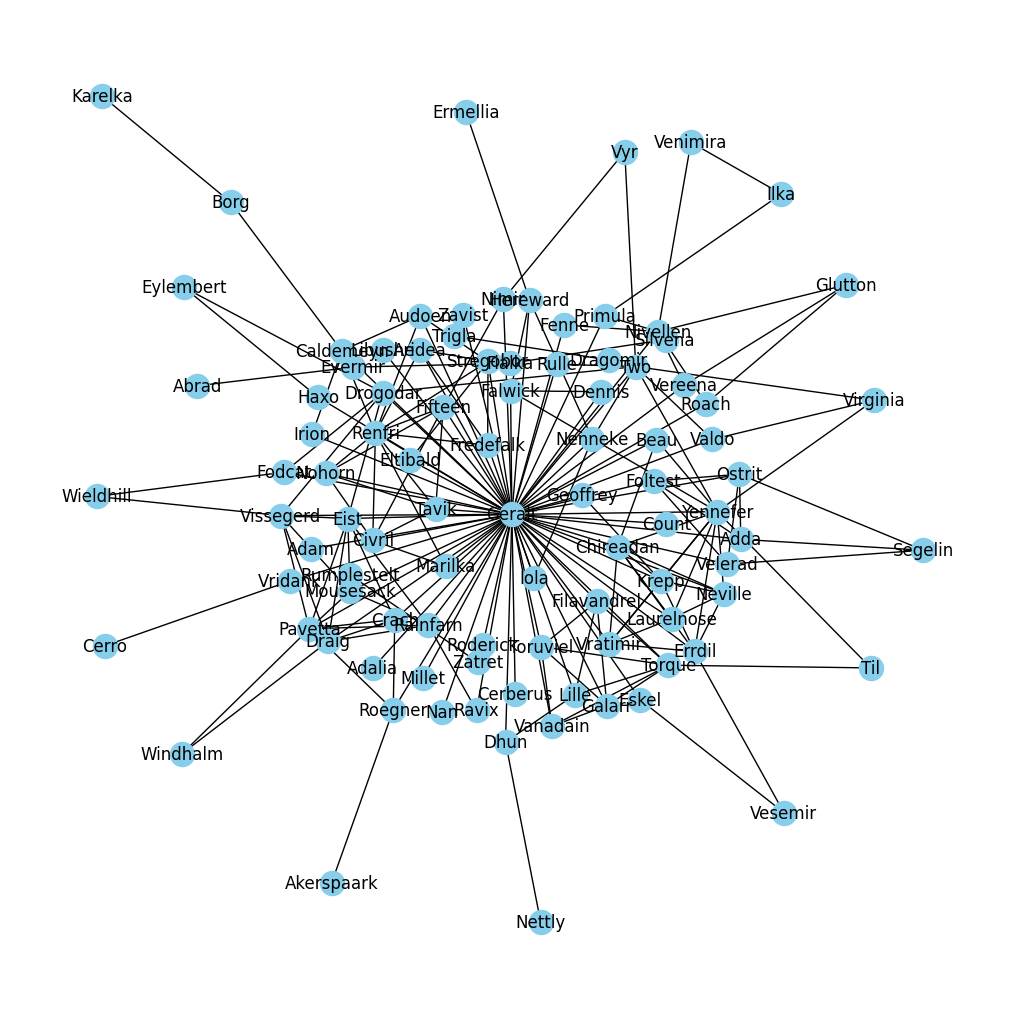

In [26]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [27]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

ModuleNotFoundError: No module named 'pyvis'

### The most important characters in The Witcher

In [ ]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.6567164179104478,
 'Niedamir': 0.1044776119402985,
 'Eyck': 0.1044776119402985,
 'Dorregaray': 0.1044776119402985,
 'Yennefer': 0.23880597014925373,
 'Boholt': 0.14925373134328357,
 'Yarpen': 0.11940298507462686,
 'Gyllenstiern': 0.11940298507462686,
 'Kennet': 0.07462686567164178,
 'Crinfrid': 0.014925373134328358,
 'Villentretenmerth': 0.04477611940298507,
 'Istredd': 0.04477611940298507,
 'Herbolth': 0.029850746268656716,
 'Ivo': 0.014925373134328358,
 'Two': 0.05970149253731343,
 'Dandelion': 0.16417910447761194,
 'Vespula': 0.05970149253731343,
 'Dainty': 0.1044776119402985,
 'Vimme': 0.07462686567164178,
 'Sulimir': 0.04477611940298507,
 'Ther': 0.014925373134328358,
 'Rhundurin': 0.029850746268656716,
 'Dudu': 0.04477611940298507,
 "Sh'eenaz": 0.05970149253731343,
 'Gaspard': 0.029850746268656716,
 'Teleri': 0.029850746268656716,
 'Dalia': 0.029850746268656716,
 'Mestvin': 0.029850746268656716,
 'Essi': 0.11940298507462686,
 'Gerard': 0.014925373134328358,
 'Zelest'

<AxesSubplot:>

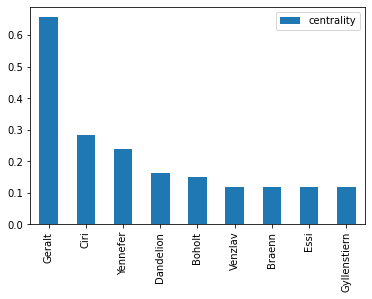

In [ ]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

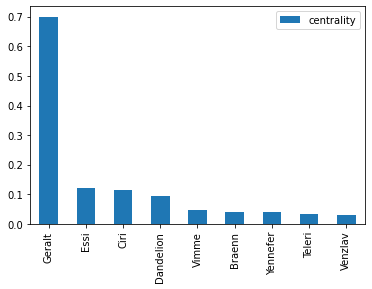

In [ ]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

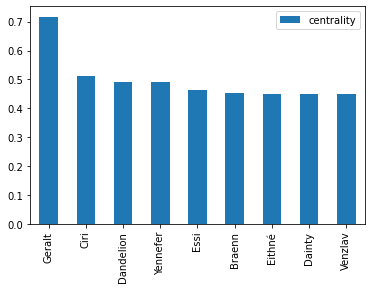

In [ ]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [ ]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### Community detection

In [ ]:
import community as community_louvain

In [ ]:
communities = community_louvain.best_partition(G)

In [ ]:
communities

{'Geralt': 2,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Boholt': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 2,
 'Herbolth': 2,
 'Ivo': 2,
 'Two': 0,
 'Dandelion': 4,
 'Vespula': 4,
 'Dainty': 4,
 'Vimme': 4,
 'Sulimir': 4,
 'Ther': 4,
 'Rhundurin': 4,
 'Dudu': 4,
 "Sh'eenaz": 4,
 'Gaspard': 6,
 'Teleri': 6,
 'Dalia': 6,
 'Mestvin': 6,
 'Essi': 4,
 'Gerard': 2,
 'Zelest': 2,
 'Duke': 4,
 'Veverka': 2,
 'Akeretta': 2,
 'Agloval': 4,
 'Ebbing': 4,
 'Juan': 4,
 'Cynthia': 4,
 'Braenn': 3,
 'Ciri': 3,
 'Kistrin': 3,
 'Eithné': 3,
 'Marck': 2,
 'Voymir': 2,
 'Alvina': 3,
 'Vesemir': 3,
 'Ervyll': 3,
 'Freixenet': 3,
 'Venzlav': 3,
 'Ekkehard': 3,
 'Viraxas': 3,
 'Morenn': 3,
 'Mona': 3,
 'Pavetta': 2,
 'Brick': 3,
 'Junghans': 3,
 'Levecque': 3,
 'King': 3,
 'Mousesack': 2,
 'Yurga': 0,
 'Visenna': 2,
 'Triss': 0,
 'Atlan': 0,
 'Vanielle': 0,
 'Lytta': 2,
 'Roach': 0,
 'Nadbor': 5,
 'Sulik': 5}

In [ ]:
nx.set_node_attributes(G, communities, 'group')

In [ ]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

### Evolution of characters' importance

In [ ]:
from lib.utils.functions import *

In [ ]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [ ]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

/var/folders/2t/5c_z4g5j7z77jprgswwd1htr0000gn/T/ipykernel_74833/4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
/var/folders/2t/5c_z4g5j7z77jprgswwd1htr0000gn/T/ipykernel_74833/4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


<AxesSubplot:>

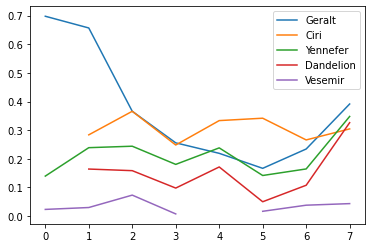

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()